# Coursera & IBM Machine Learning - CLUSTERING Final Project
## Required

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required in your report:

* Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.
* Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.
* Brief summary of data exploration and actions taken for data cleaning orfeature engineering.
* Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.
* A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.
* Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.
* Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

## Review criteria

Your peer or instructor will review your report from the perspective of a Chief Data Officer or the Head of Analytics of your team and will assess whether the Unsupervised Learning model you selected best helped you achieve the main objective of your analysis.

Yes, you are expected to leverage a wide variety of tools, but this report should focus on presenting findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not a code review. Optionally, you can submit your code as a python notebook or as a print out in the appendix of your document.

The grading will center around __5 main points__:

* Does the report include a section describing the data?
* Does the report include a paragraph detailing the main objective(s) of this analysis?  
* Does the report include a section with variations of Unsupervised Learning models and specifies which one is the model that best suits the main objective(s) of this analysis?
* Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
* Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different modeling techniques? 

## 1. Import Dataset & Quality Check

In [1]:
# import all depedencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 12})
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [2]:
# load dataset into DataFrame
data = pd.read_csv('mall_customers.csv')
print(data.shape)
data

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# check missing values
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# rename some columns
data = data.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'})
data.drop('CustomerID', axis=1, inplace=True)
data.columns

Index(['gender', 'age', 'annual_income', 'spending_score'], dtype='object')

In [6]:
# check for duplcates (not counting first occurance)
data.duplicated(keep='first').sum()

0

## 2. Exploratory Data Analysis and Visualization

In [7]:
data.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
# counting & visualising gender 
data['gender'].value_counts()

Female    112
Male       88
Name: gender, dtype: int64

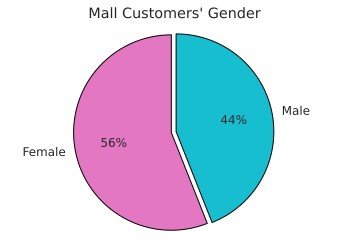

In [9]:
ax = plt.axes()
ax.pie(np.array(data['gender'].value_counts()),labels=['Female','Male'],explode=(0,0.05),
        colors=['#e377c2','#17becf'],autopct='%1.0f%%',startangle=90,wedgeprops={"edgecolor":"k"})
ax.axis('equal')
plt.title('Mall Customers\' Gender')
plt.show();

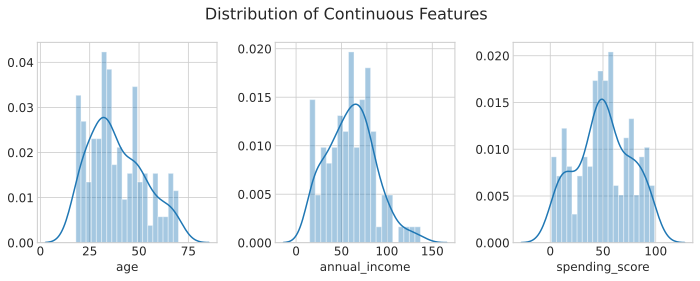

In [10]:
feature_list= ['age', 'annual_income', 'spending_score']
fig, axs = plt.subplots(ncols=3, nrows=1, sharey=False, figsize=(10,4))
fig.suptitle('Distribution of Continuous Features', fontsize=16)
pos=0
for i in feature_list:
    sns.distplot(data[i],ax=axs[pos],bins=20)
    pos+=1
plt.tight_layout();

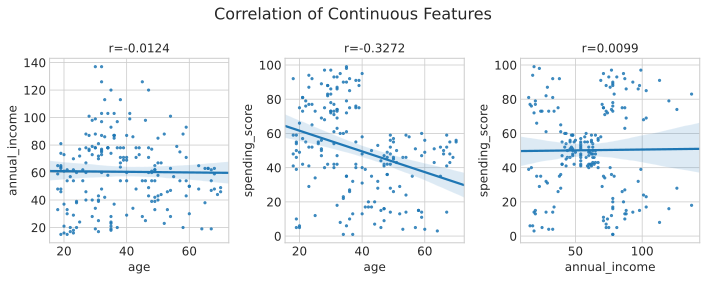

In [11]:
corr_mat= np.array(data[feature_list].corr())

fig = plt.figure(figsize=(10,4))
fig.suptitle('Correlation of Continuous Features', fontsize=16)
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b','#bcbd22']

gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("r={:0.4f}".format(corr_mat[0,1]),size=12)
ax1 = sns.regplot(x='age',y='annual_income',data=data,scatter_kws={'s':5})
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("r={:0.4f}".format(corr_mat[0,2]),size=12)
ax2 = sns.regplot(x='age',y='spending_score',data=data,scatter_kws={'s':5})
ax3 = fig.add_subplot(gs[0, 2])
ax3.set_title("r={:0.4f}".format(corr_mat[2,1]),size=12)
ax3 = sns.regplot(x='annual_income',y='spending_score',data=data,scatter_kws={'s':5})

plt.tight_layout();

## 3. Data Pre-Processing

In [12]:
# encoding gender
data['gender'].replace(['Female','Male'], [0,1],inplace=True)
data['gender'].value_counts()

0    112
1     88
Name: gender, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
X = data[feature_list]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.c_[X, data['gender'].values]
X[:5,:]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.42456879, -1.73899919, -0.43480148,  1.        ],
       [-1.28103541, -1.73899919,  1.19570407,  1.        ],
       [-1.3528021 , -1.70082976, -1.71591298,  0.        ],
       [-1.13750203, -1.70082976,  1.04041783,  0.        ],
       [-0.56336851, -1.66266033, -0.39597992,  0.        ]])

## 4. Clustering Model
### 4.1 K-Means

In [14]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
# create some metrics
def inertia(X,labels):
    mu= X.copy()
    # mu of cluster
    for i in np.unique(labels):
        mu[labels==i,:] = np.mean(X[labels==i,:],axis=0)
    
    d= np.sum((X-mu)**2)
    return round(d, 4)

def distortion(X,labels):
    mu= X.copy()
    # mu of cluster
    for i in np.unique(labels):
        mu[labels==i,:] = np.mean(X[labels==i,:],axis=0)
        
    d= np.sum((X-mu)**2)/X.shape[0]
    return round(d, 4)

In [15]:
distortions = []
inertias = []
silhouettes = []
K = range(2, 11)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeanModel.fit(X)
 
    inertias.append(kmeanModel.inertia_)
    distortions.append(distortion(X, kmeanModel.labels_))
    silhouettes.append(silhouette_score(X, kmeanModel.labels_))
    
print("KMeans Clustering Done!")

KMeans Clustering Done!


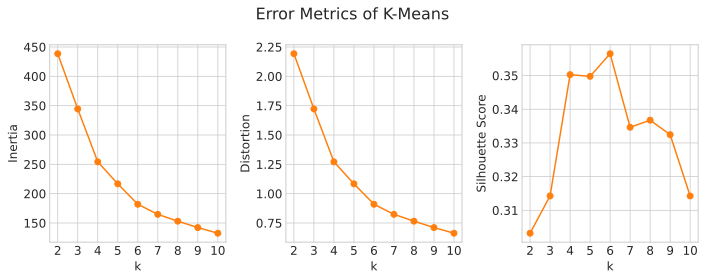

In [16]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('Error Metrics of K-Means', fontsize=16)

gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
# ax1.set_title('Inertia vs k')
ax1.set_xlabel('k')
ax1.set_ylabel('Inertia')
ax1 = plt.plot(K, inertias,'-o',c=colors[1]), plt.xticks(K)
ax2 = fig.add_subplot(gs[0, 1])
# ax2.set_title('Distortion vs k')
ax2.set_xlabel('k')
ax2.set_ylabel('Distortion')
ax2 = plt.plot(K, distortions,'-o',c=colors[1]), plt.xticks(K)
ax3 = fig.add_subplot(gs[0, 2])
# ax3.set_title('Silhouette Score vs k')
ax3.set_xlabel('k')
ax3.set_ylabel('Silhouette Score')
ax3 = plt.plot(K, silhouettes,'-o',c=colors[1]), plt.xticks(K)
plt.tight_layout();

In [17]:
# best kmeans model
k=6
kmeanModel = KMeans(n_clusters=k,init='k-means++',random_state=42)
kmeanModel.fit(X)
k_mean_lab=kmeanModel.labels_
best_kmean_errors= [k,kmeanModel.inertia_,distortion(X,k_mean_lab),silhouette_score(X,k_mean_lab)]

### 4.2 Ward Agglomerative Clustering

In [18]:
distortions = []
inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    wardModel = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    wardModel.fit(X)
 
    inertias.append(inertia(X,wardModel.labels_))
    distortions.append(distortion(X,wardModel.labels_))
    silhouettes.append(silhouette_score(X,wardModel.labels_))
    
print("Ward Clustering Done!")

Ward Clustering Done!


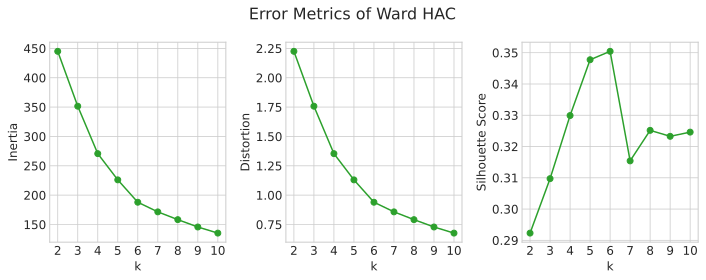

In [19]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('Error Metrics of Ward HAC', fontsize=16)

gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
# ax1.set_title('Inertia vs k')
ax1.set_xlabel('k')
ax1.set_ylabel('Inertia')
ax1 = plt.plot(K, inertias,'-o',c=colors[2]), plt.xticks(K)
ax2 = fig.add_subplot(gs[0, 1])
# ax2.set_title('Distortion vs k')
ax2.set_xlabel('k')
ax2.set_ylabel('Distortion')
ax2 = plt.plot(K, distortions,'-o',c=colors[2]), plt.xticks(K)
ax3 = fig.add_subplot(gs[0, 2])
# ax3.set_title('Silhouette Score vs k')
ax3.set_xlabel('k')
ax3.set_ylabel('Silhouette Score')
ax3 = plt.plot(K, silhouettes,'-o',c=colors[2]), plt.xticks(K)
plt.tight_layout();

In [20]:
# best HAC ward model
k=6
wardModel = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
wardModel.fit(X)
ward_lab=wardModel.labels_
best_ward_errors= [k,inertia(X,ward_lab),distortion(X,ward_lab),silhouette_score(X,ward_lab)]

### 4.3 Average Agglomerative Clustering

In [21]:
distortions = []
inertias = []
silhouettes = []
K = range(2, 12)

for k in K:
    avgModel = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')
    avgModel.fit(X)
 
    inertias.append(inertia(X,avgModel.labels_))
    distortions.append(distortion(X,avgModel.labels_))
    silhouettes.append(silhouette_score(X,avgModel.labels_))
    
print("Average Clustering Done!")

Average Clustering Done!


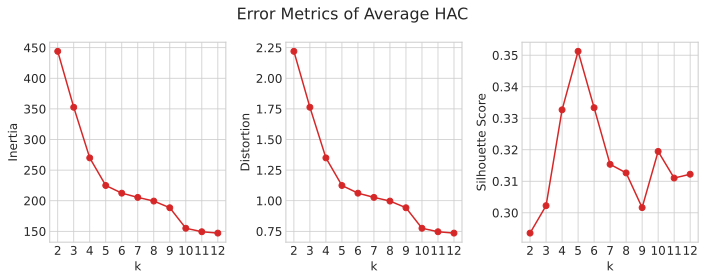

In [22]:
fig = plt.figure(figsize=(10,4))
fig.suptitle('Error Metrics of Average HAC', fontsize=16)

gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 0])
# ax1.set_title('Inertia vs k')
ax1.set_xlabel('k')
ax1.set_ylabel('Inertia')
ax1 = plt.plot(K, inertias,'-o',c=colors[3]), plt.xticks(K)
ax2 = fig.add_subplot(gs[0, 1])
# ax2.set_title('Distortion vs k')
ax2.set_xlabel('k')
ax2.set_ylabel('Distortion')
ax2 = plt.plot(K, distortions,'-o',c=colors[3]), plt.xticks(K)
ax3 = fig.add_subplot(gs[0, 2])
# ax3.set_title('Silhouette Score vs k')
ax3.set_xlabel('k')
ax3.set_ylabel('Silhouette Score')
ax3 = plt.plot(K, silhouettes,'-o',c=colors[3]), plt.xticks(K)
plt.tight_layout();

In [23]:
# best HAC acg model
k=5
avgModel = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')
avgModel.fit(X)
avg_lab=avgModel.labels_
best_avg_errors= [k,inertia(X,avg_lab),distortion(X,avg_lab),silhouette_score(X,avg_lab)]

### 4.5 Model Evaluation

In [24]:
# model eval table
model_evaL = pd.DataFrame([best_kmean_errors, best_ward_errors, best_avg_errors],
                          index=['K-Means','Ward HAC','Avg HAC'],columns=['k','Inertia','Distortion','Silhouette'])
model_evaL = model_evaL.T
round(model_evaL,4)

,K-Means,Ward HAC,Avg HAC
k,6.0000,6.0000,5.0000
Inertia,181.9514,187.9196,224.8630
Distortion,0.9098,0.9396,1.1243
Silhouette,0.3565,0.3504,0.3512


## 5. Cluster Analysis

In [25]:
# add clusters to dataframe for further analysis
data['cluster']= k_mean_lab
data['gender'].replace([0,1], ['Female','Male'],inplace=True)
data.head()

,gender,age,annual_income,spending_score,cluster
0,Male,19,15,39,5
1,Male,21,15,81,5
2,Female,20,16,6,3
3,Female,23,16,77,5
4,Female,31,17,40,3


In [26]:
# summarize clusters
clst_data = data.groupby('cluster').mean().round(2)
clst_data.rename(columns={'age':'mean_age','annual_income':'mean_annual_income','spending_score':'mean_spending_score'},inplace=True)
genders=np.array(data.groupby('cluster').gender.value_counts()).reshape(6,2)
genders[4,0],genders[4,1] = genders[4,1],genders[4,0]
clst_data['#female']=genders[:,0]
clst_data['#male']=genders[:,1]
clst_data['#total']=genders.sum(axis=1)
clst_data.sort_values(by='mean_spending_score',ascending=False)
# clst_data

,mean_age,mean_annual_income,mean_spending_score,#female,#male,#total
cluster,,,,,,
1,32.69,86.54,82.13,21,18,39
5,25.00,25.26,77.61,13,10,23
2,27.00,56.66,49.13,25,13,38
0,56.33,54.27,49.07,26,19,45
3,45.52,26.29,19.38,13,8,21
4,41.26,88.50,16.76,14,20,34


In [27]:
# centroid validation
centr=kmeanModel.cluster_centers_[:,:3]
centr=scaler.inverse_transform(centr)
np.round(centr,2)

array([[56.33, 54.27, 49.07],
       [32.69, 86.54, 82.13],
       [27.  , 56.66, 49.13],
       [45.52, 26.29, 19.38],
       [41.26, 88.5 , 16.76],
       [25.  , 25.26, 77.61]])

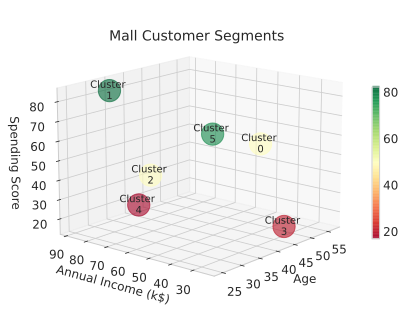

In [28]:
# visualize cluster centroids
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(clst_data['mean_age'],
           clst_data['mean_annual_income'],
           clst_data['mean_spending_score'],
           c=clst_data['mean_spending_score'],
           cmap='RdYlGn',
           alpha=0.6,s=500)

for line in range(0,clst_data.shape[0]):
     ax.text(clst_data['mean_age'][line],
             clst_data['mean_annual_income'][line],
             clst_data['mean_spending_score'][line],
             s=('Cluster \n'+str(line)),fontsize=10,
             ha='center',va='center')
             
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score")
ax.set_title('Mall Customer Segments',fontsize=14,y=0.95)
fig.colorbar(p, ax=ax, shrink=0.28)
ax.view_init(15,-140);